In [5]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer

In [7]:
# load data
path = '/content/drive/MyDrive/Coding Dojo/Raw Data/Boston_Housing_from_Sklearn.csv'
df = pd.read_csv(path)
df.head()

CRIM    NOX     RM   AGE  PTRATIO  LSTAT  PRICE
0  0.00632  0.538  6.575  65.2     15.3   4.98   24.0
1  0.02731  0.469  6.421  78.9     17.8   9.14   21.6
2  0.02729  0.469  7.185  61.1     17.8   4.03   34.7
3  0.03237  0.458  6.998  45.8     18.7   2.94   33.4
4  0.06905  0.458  7.147  54.2     18.7   5.33   36.2

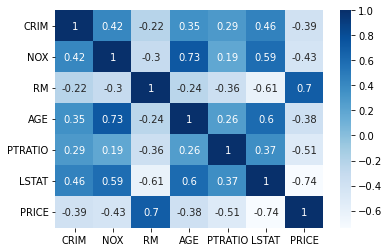

In [9]:
# make heatmap of correlations to identify any features with
# correlation coefficient of magnitute 0.5 or greater with price
corr = df.corr()
sns.heatmap(data = corr, cmap = 'Blues', annot = True);

The strongest correlations to Price are within the LSTAT, PTRATIO, and RM columns.  We will limit our analysis to these three features.

In [10]:
# select feature matrix (X) and target vector (y)
y = df['PRICE']
X = df.drop(columns = ['PRICE', 'AGE', 'NOX', 'CRIM'])

In [11]:
# split data into train and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [13]:
# instantiate model and fit to training set
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [16]:
# evaluate model using r^2 on training and test sets
train_score = lin_reg.score(X_train, y_train)
test_score = lin_reg.score(X_test, y_test)
print('r^2 for training data is:', train_score)
print('r^2 for testing data is:', test_score)

r^2 for training data is: 0.6877966145058925
r^2 for testing data is: 0.6331590458194678


The model is performing roughly 5% better on the training data according to the r^2 values.

In [23]:
# evaluate model using MAE
train_pred = lin_reg.predict(X_train)
train_mae = mean_absolute_error(y_train, train_pred)
print('MAE for training data is', train_mae)

MAE for training data is 3.714054057158005


In [24]:
test_pred = lin_reg.predict(X_test)
test_mae = mean_absolute_error(y_test, test_pred)
print('MAE for testing data is', test_mae)

MAE for testing data is 3.3918448293813976


In [25]:
# evaluate model using MSE
train_mse = mean_squared_error(y_train, train_pred)
print('MSE for training data is', train_mse)

MSE for training data is 27.68673681796949


In [26]:
test_mse = mean_squared_error(y_test, test_pred)
print('MSE for testing data is', test_mse)

MSE for testing data is 25.688824196675956


In [29]:
# evaluate model performance using RMSE on training and testing set
print('The RMSE for the training data is', np.sqrt(train_mse))

The RMSE for the training data is 5.261818774717492


In [31]:
print('The RMSE for the testing data is', np.sqrt(test_mse))

The RMSE for the testing data is 5.068414367104959
